# Plotting using Matplotlib and Seaborn

[Matplotlib](http://matplotlib.org) is a basic plotting library for Python inspired by Matlab. [Seaborn](http://stanford.edu/~mwaskom/software/seaborn) is built on top of it with integrated analysis, specialized plots, and pretty good integration with Pandas.

Also see [the full gallery of Seaborn](http://stanford.edu/~mwaskom/software/seaborn/examples/index.html) or [Matplotlib](http://matplotlib.org/gallery.html).


In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [2]:
#use a standard dataset of heterogenous data
cars = pd.read_csv('data/mtcars.csv')
cars.head()

,car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Scatterplot

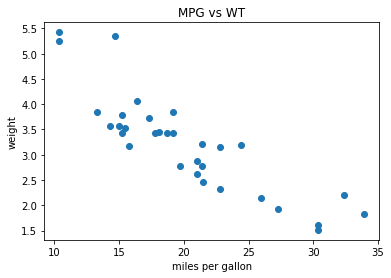

In [3]:
plt.scatter(x=cars['mpg'],y=cars['wt'])
plt.xlabel('miles per gallon')
plt.ylabel('weight')
plt.title('MPG vs WT')
plt.show()

<AxesSubplot:xlabel='mpg', ylabel='wt'>

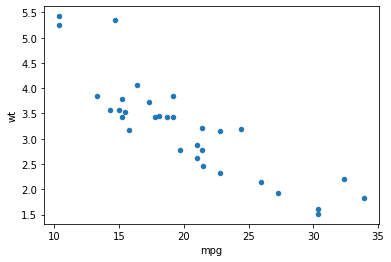

In [4]:
#integrated in pandas, too
cars.plot(x='mpg',y='wt',kind='scatter')

<AxesSubplot:xlabel='mpg', ylabel='wt'>

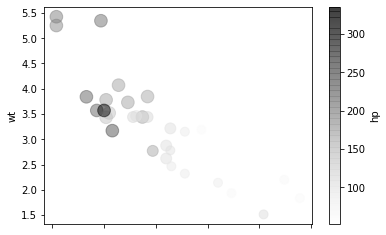

In [5]:
cars.plot(kind='scatter', x='mpg',y='wt',c='hp',s=cars['cyl']*20,alpha=0.5)

<AxesSubplot:>

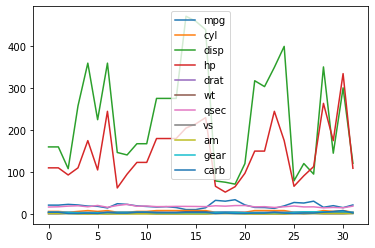

In [6]:
#what if we plot everything?
cars.plot()

## Histogram

<AxesSubplot:>

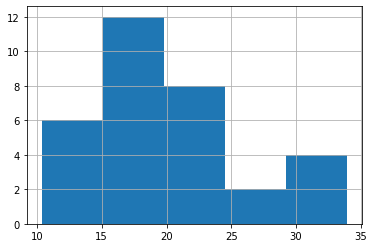

In [7]:
cars['mpg'].hist(bins=5)

Text(0.5, 1.0, 'miles per gallon')

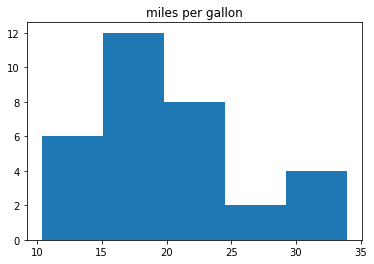

In [8]:
plt.hist(cars['mpg'],bins=5)
plt.title('miles per gallon')

<AxesSubplot:xlabel='mpg', ylabel='Density'>

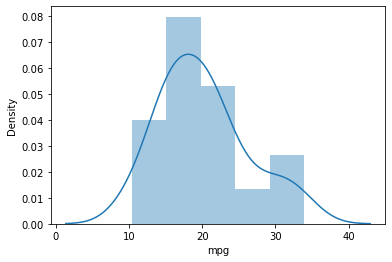

In [9]:
#seaborn not just a histogram but also an kernel density enstimation and better default settings
sns.distplot(cars['mpg'],bins=5)

# Box plots

<AxesSubplot:>

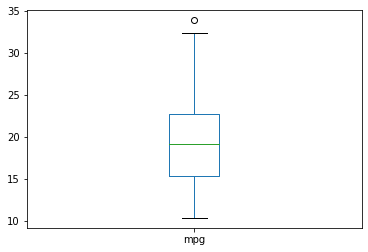

In [10]:
#box plots
cars['mpg'].plot(kind='box')

<AxesSubplot:>

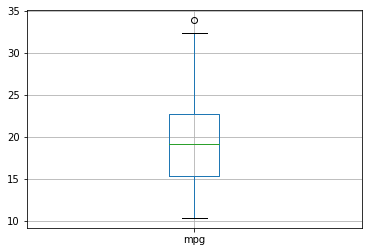

In [11]:
cars.boxplot('mpg')

<AxesSubplot:title={'center':'mpg'}, xlabel='gear'>

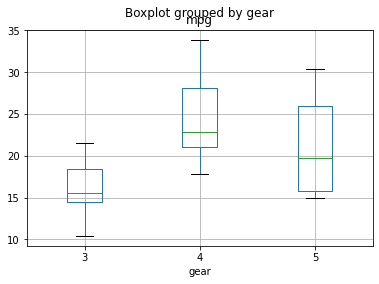

In [12]:
#group by gear
cars.boxplot('mpg', by='gear')

In [13]:
# load gapminder again and select 2007
gap = pd.read_csv('data/gapminder-unfiltered.tsv',index_col=0, sep='\t')
gap2007 = gap[gap.year == 2007]
gap2007.columns

Index(['continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [14]:
gap2007.head()

,continent,year,lifeExp,pop,gdpPercap
country,,,,,
Afghanistan,Asia,2007,43.828,31889923.0,974.580338
Albania,Europe,2007,76.423,3600523.0,5937.029526
Algeria,Africa,2007,72.301,33333216.0,6223.367465
Angola,Africa,2007,42.731,12420476.0,4797.231267
Argentina,Americas,2007,75.320,40301927.0,12779.379640


## Log scale

<AxesSubplot:xlabel='lifeExp', ylabel='gdpPercap'>

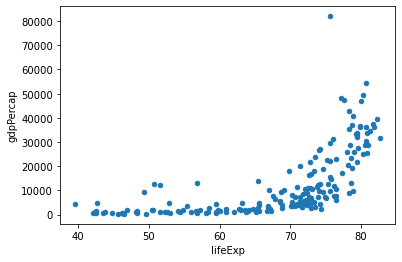

In [15]:
gap2007.plot(kind='scatter', x='lifeExp',y='gdpPercap')

The data is unbalanced with outliers. What about log scale?

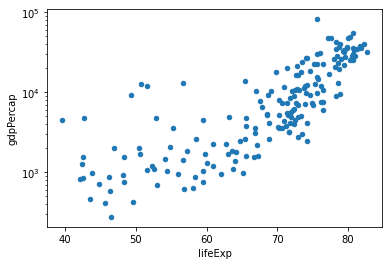

In [16]:
gap2007.plot(kind='scatter', x='lifeExp',y='gdpPercap')
plt.yscale('log')

## Grouping / coloring plots

How to group by color?
1. Multiple plots on top of each other
2. One plot, with marks colored by data

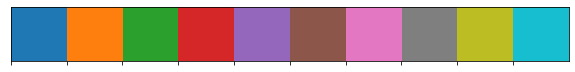

In [17]:
#create a color palette, e.g., with seaborn:
colors = sns.color_palette()
sns.palplot(colors)

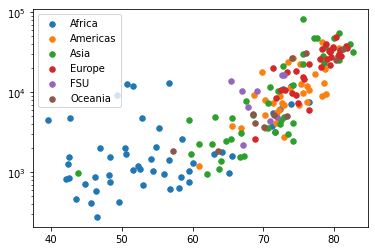

In [18]:
#for each group create an own plot and overlay them
for (name, group),color in zip(gap2007.groupby('continent'),colors):
    plt.scatter(x=group['lifeExp'],y=group['gdpPercap'],label=name,c=[color],s=30)
plt.yscale('log')
plt.legend()

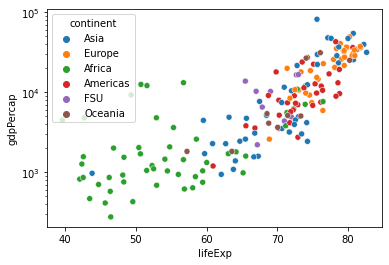

In [19]:
# Vary hue by column:
sns.scatterplot(x='lifeExp', y='gdpPercap', hue='continent', data=gap2007)
plt.yscale('log')

<AxesSubplot:xlabel='continent', ylabel='gdpPercap'>

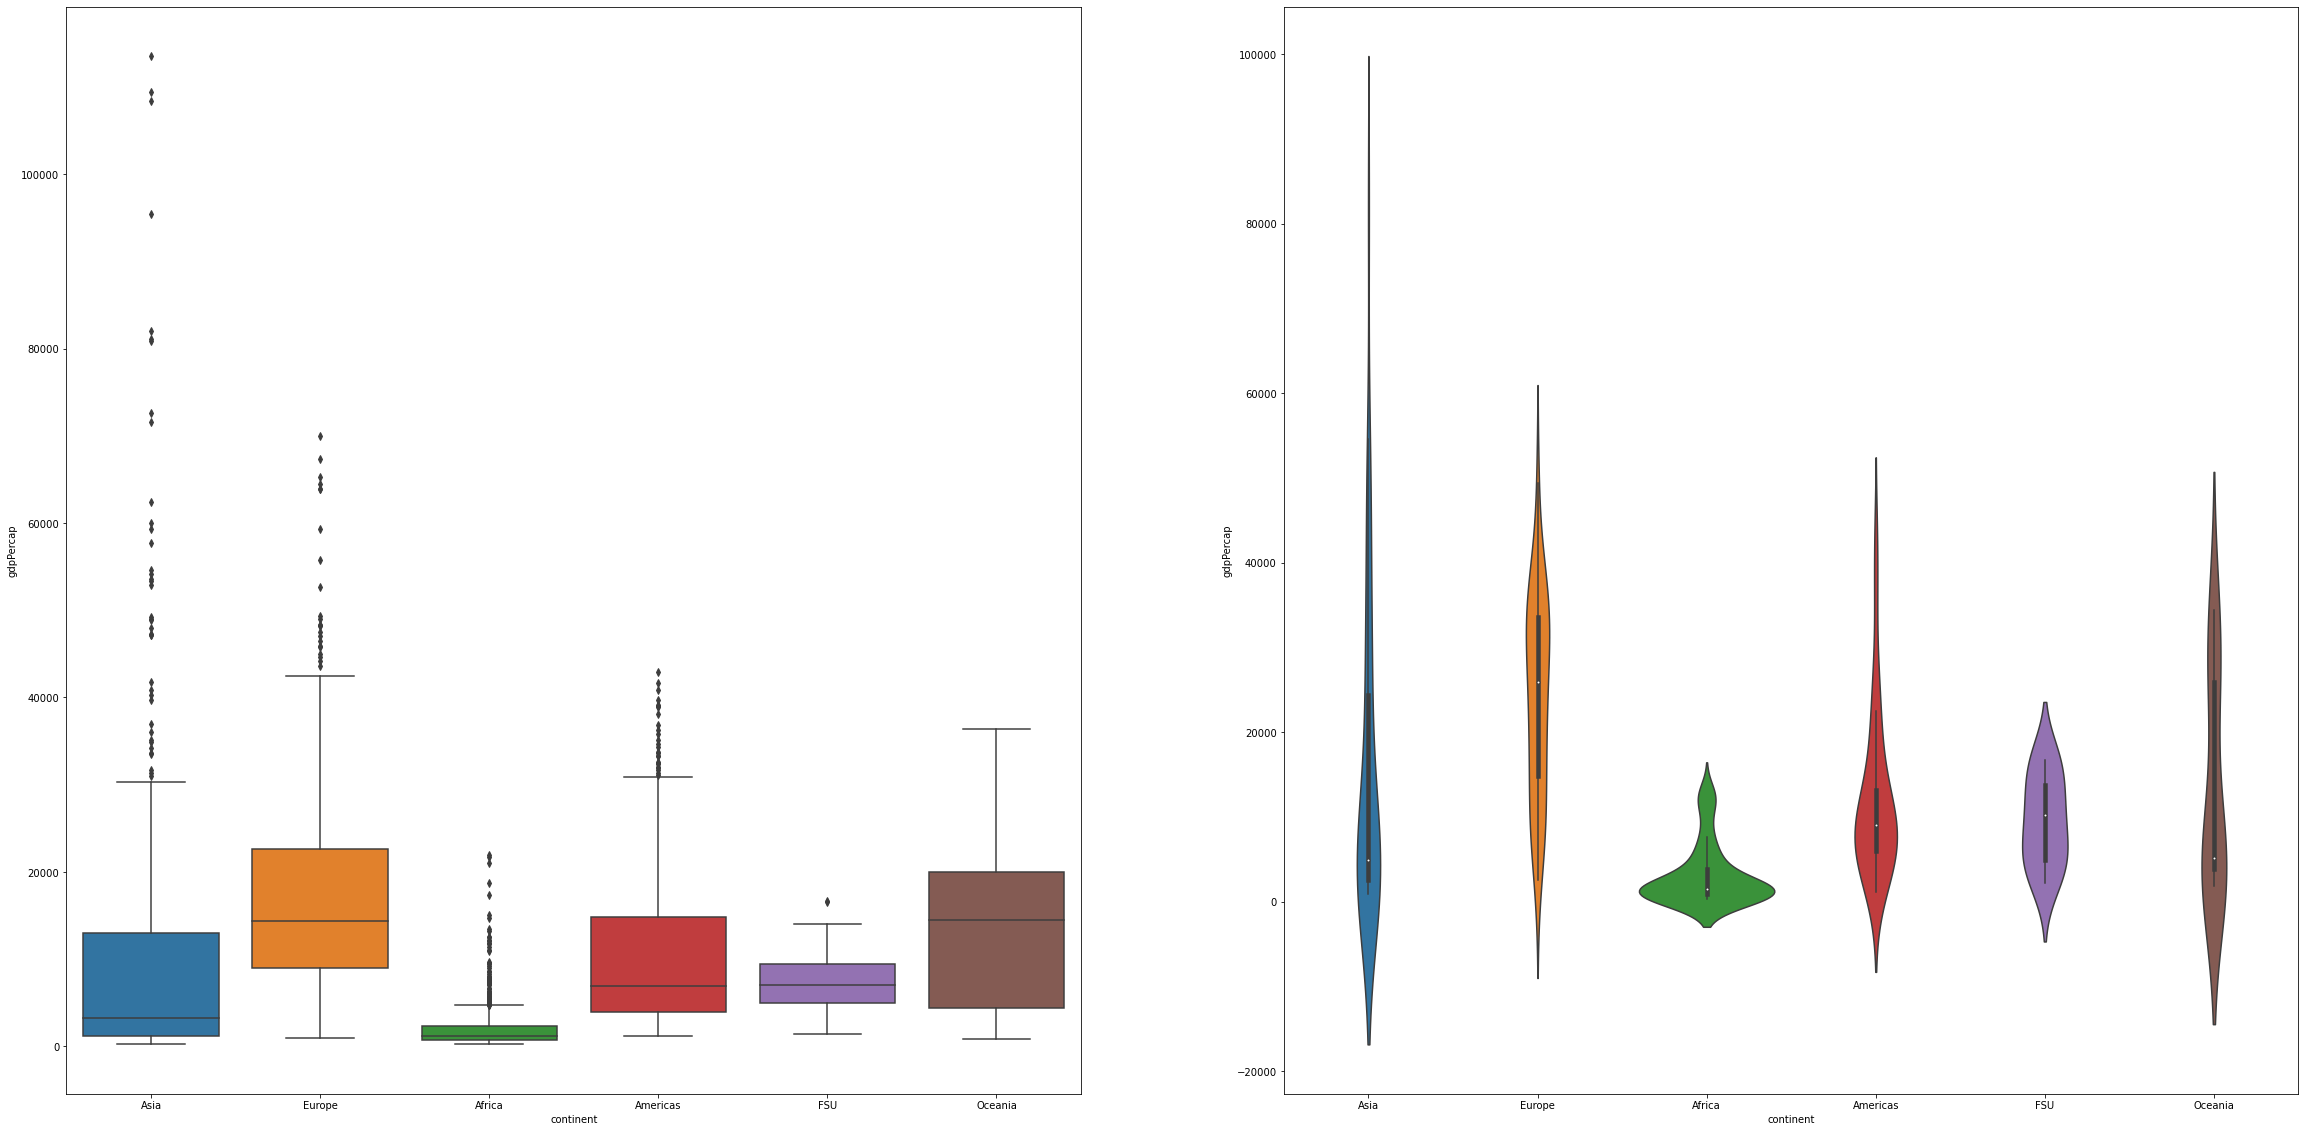

In [20]:
#playing with categories ... seaborn is pretty good with it
plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='continent',y='gdpPercap',data=gap)

plt.subplot(122)
sns.violinplot(x='continent',y='gdpPercap',data=gap2007)

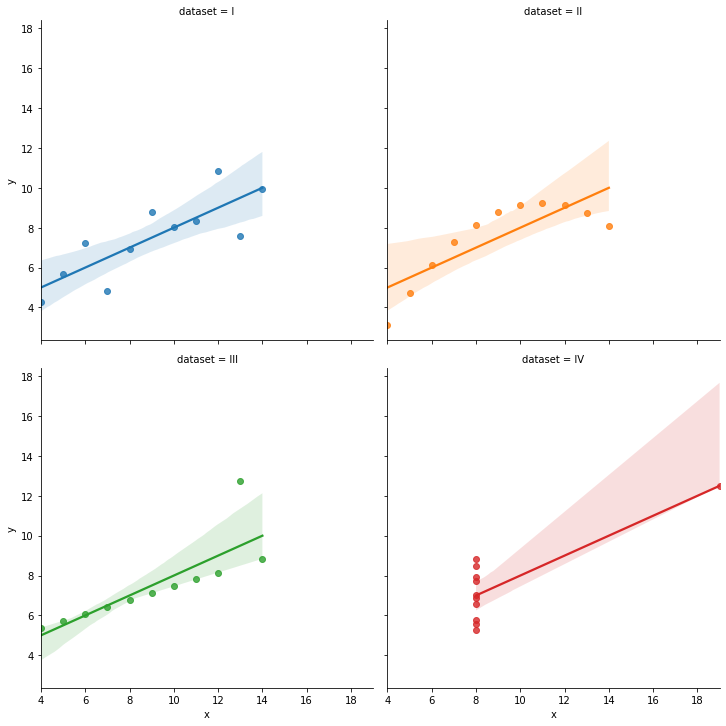

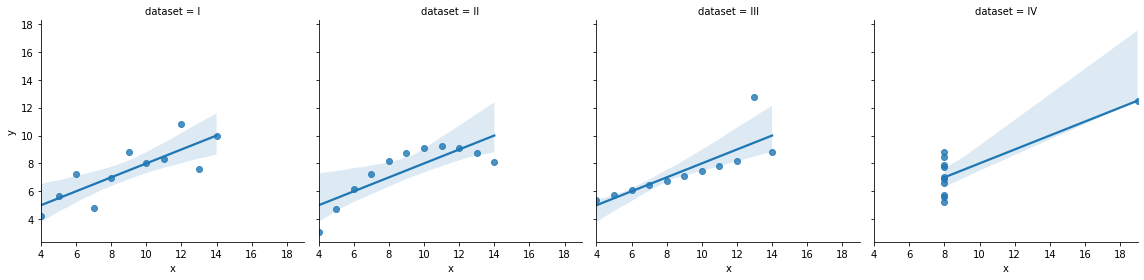

In [21]:
# or with linear regression

anscombe = sns.load_dataset("anscombe")
sns.lmplot('x','y',col='dataset',hue='dataset', data=anscombe, col_wrap=2)
g = sns.FacetGrid(anscombe, col="dataset", height=4, aspect=1)
g.map(sns.regplot, "x", "y")

/home/klaus/anaconda3/envs/python-tutorial/lib/python3.8/site-packages/seaborn/matrix.py:1215: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


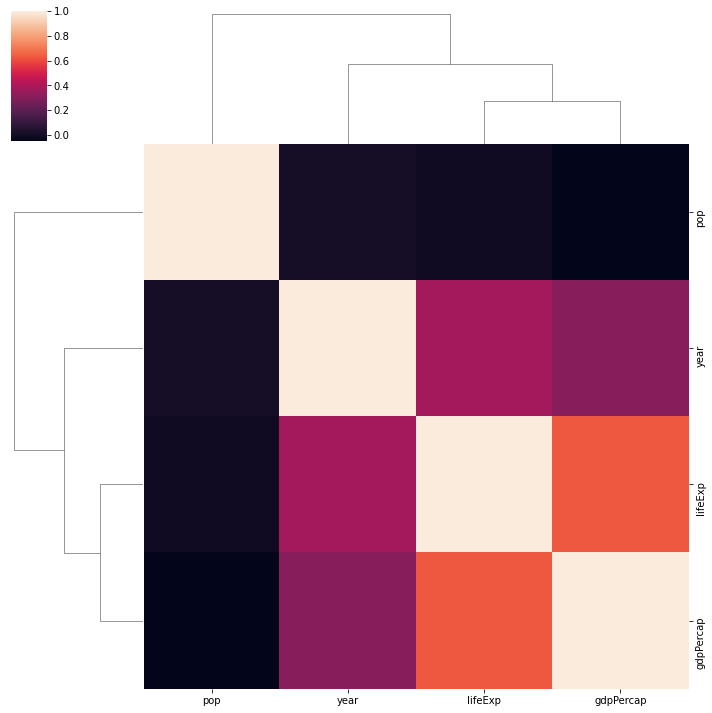

In [22]:
# or with structured heatmaps

#compute the correlations and take a look at them
corrmat = gap.corr()

# draw a clustered heatmap using seaborn
sns.clustermap(corrmat, square=True)

## TASK
> Create a scatterplot where 
> * x = lifeExp 
> * y = gdpPerCap
> * color = continent
> * size = pop
>
> Label the axis appropiately and use a log scale for gdp.

Text(0, 0.5, 'GDP Per Cap')

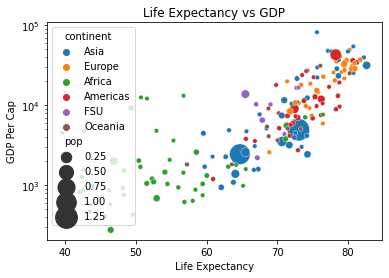

In [23]:
sns.scatterplot(x='lifeExp', y='gdpPercap', hue='continent', size='pop', sizes=(20,500), data=gap2007)
plt.yscale('log')
plt.title('Life Expectancy vs GDP')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP Per Cap')

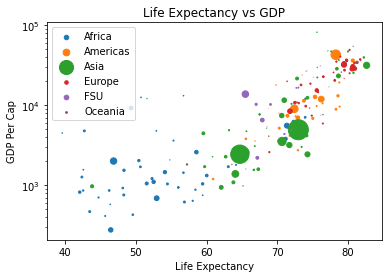

In [24]:
#for each group create an own plot an overlay them
pop_max = gap2007['pop'].max()
for (name, group),color in zip(gap2007.groupby('continent'),colors):
    plt.scatter(x=group['lifeExp'],y=group['gdpPercap'],label=name, c=[color],s=(group['pop']/pop_max)*400)
plt.yscale('log')
plt.title('Life Expectancy vs GDP')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP Per Cap')
plt.legend()

## Annotations
Small text cues and labels can improve visualisations a lot. They can label outliers, explain why data is missing, or describe a trend change in the data.

### Simple Text

In [ ]:
plt.text?

In [26]:
# Get the three largest countries
gap2007.nlargest(3,'pop')

,continent,year,lifeExp,pop,gdpPercap
country,,,,,
China,Asia,2007,72.961,1.318683e+09,4959.114854
India,Asia,2007,64.698,1.110396e+09,2452.210407
United States,Americas,2007,78.242,3.011399e+08,42951.653090


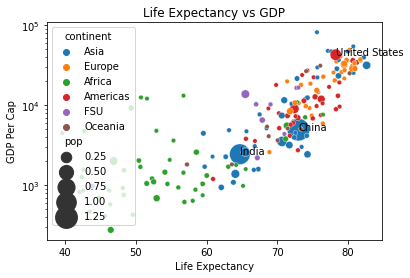

In [27]:
sns.scatterplot(x='lifeExp', y='gdpPercap', hue='continent', size='pop', sizes=(20,500), data=gap2007)
plt.yscale('log')
plt.title('Life Expectancy vs GDP')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP Per Cap')

# Add the name of the countries on top
for index, country in gap2007.nlargest(3,'pop').iterrows():
    plt.text(country['lifeExp'], country['gdpPercap'], index)

### Annotations
However, the text quickly hides data, so you may want to move the labels to a free area.
This is where annotations come into play.


In [ ]:
plt.annotate?

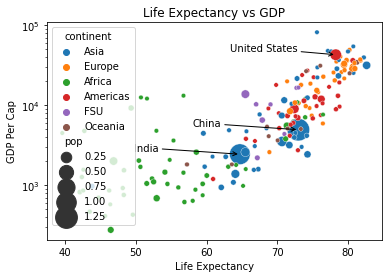

In [29]:
sns.scatterplot(x='lifeExp', y='gdpPercap', hue='continent', size='pop', sizes=(20,500), data=gap2007)
plt.yscale('log')
plt.title('Life Expectancy vs GDP')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP Per Cap')


for name, data in gap2007.nlargest(3,'pop').iterrows():
    plt.annotate(
        name, # the text
        xy=(data['lifeExp'], data['gdpPercap']), #what to annotate
        xytext=(data['lifeExp']-15, data['gdpPercap']*1.1), # where the text should be
        arrowprops=dict(arrowstyle="->") # how to connect label and target
    )

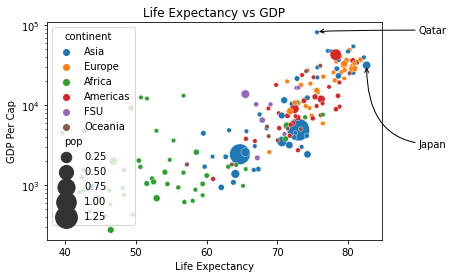

In [30]:
sns.scatterplot(x='lifeExp', y='gdpPercap', hue='continent', size='pop', sizes=(20,500), data=gap2007)
plt.yscale('log')
plt.title('Life Expectancy vs GDP')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP Per Cap')

i=2
for name, data in gap2007.nlargest(1,'lifeExp')[::-1].iterrows(): # countries with highest lifeExpectancy
    plt.annotate(
        name, 
        xy=(data['lifeExp'], data['gdpPercap']), 
        xytext=(90, 2000+500*i),
        arrowprops=dict(
            arrowstyle="->",
            connectionstyle="angle3,angleA=0,angleB=-90" # curved connector
        )
    )
    i = i**2
    
i=1
for name, data in gap2007.nlargest(1,'gdpPercap').iterrows(): # countries with highest GDP per capita
    plt.annotate(
        name, 
        xy=(data['lifeExp'], data['gdpPercap']), 
        xytext=(90, 10**5-20000*i),
        arrowprops=dict(
             arrowstyle="->",
             connectionstyle="angle3,angleA=0,angleB=-90"
        )
    )
    i+=1

## Next

[Interactive Plotting with Widgets and Altair](04_InteractivePlotting.ipynb)